In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('df_tratado.csv', sep=',')
df.head()

,Unnamed: 0,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,latitude,longitude,regional,delegacia,uop,origem_arquivo,dia,mes,ano,grave
0,1,405158.0,2022-01-01,Sábado,02:40:00,PR,116,33.0,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,...,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,1,1,2022,1
1,28,405442.0,2022-02-01,Domingo,12:00:00,SC,116,54.0,PAPANDUVA,Velocidade Incompatível,...,"-26,39448417","-50,16480003",SPRF-SC,DEL06-SC,UOP02-DEL06-SC,datatran2022.csv,1,2,2022,0
2,34,405542.0,2022-02-01,Domingo,18:40:00,RS,290,112.0,ELDORADO DO SUL,Acessar a via sem observar a presença dos outr...,...,"-30,040455","-51,329193",SPRF-RS,DEL02-RS,UOP01-DEL02-RS,datatran2022.csv,1,2,2022,0
3,36,405558.0,2022-02-01,Domingo,23:00:00,SC,101,118.0,ITAJAI,Ingestão de álcool pelo condutor,...,"-26,895859","-48,71903",SPRF-SC,DEL04-SC,UOP04-DEL04-SC,datatran2022.csv,1,2,2022,0
4,38,405589.0,2022-03-01,Segunda,03:30:00,SC,101,329.0,CAPIVARI DE BAIXO,Ingestão de álcool pelo condutor,...,"-28,45039264","-48,97180974",SPRF-SC,DEL02-SC,UOP01-DEL02-SC,datatran2022.csv,1,3,2022,0


In [3]:
features = ['dia_semana','fase_dia','condicao_metereologica','tipo_pista','veiculos']
X = df[features]
y = df['grave']

In [4]:
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

C:\Users\adria\AppData\Local\Temp\ipykernel_652\1733159600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\adria\AppData\Local\Temp\ipykernel_652\1733159600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\adria\AppData\Local\Temp\ipykernel_652\1733159600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [6]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [7]:
#Treinar modelo com pesos balanceados
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

# 6. Impressão das métricas
print(f"Acurácia:  {acc:.4f}")
print(f"Precisão:  {prec:.4f}")
print(f"Revocação: {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")

Acurácia:  0.6884
Precisão:  0.0517
Revocação: 0.5298
F1-Score:  0.0942



Matriz de Confusão:


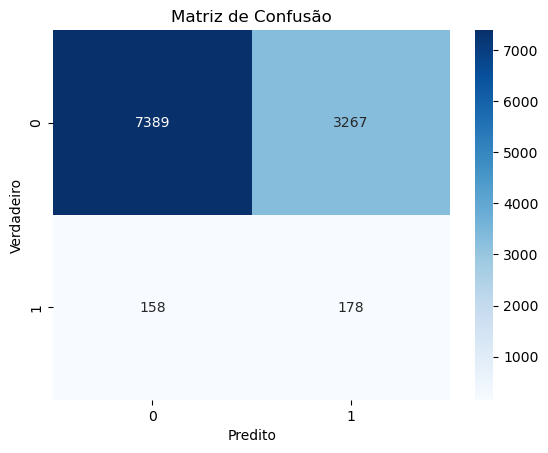

In [10]:
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()